### **Background**
The data used here is from [This](https://astrogeology.usgs.gov/search/map/mars_2020_terrain_relative_navigation_ctx_dtm_mosaic#open) reference from [Astrogeology Gov](https://astrogeology.usgs.gov/search)
- The image that is used is "Mars 2020 Terrain Relative Navigation CTX DTM Mosaic"
- The image is a 2D array of 2048x1940 pixels, each pixel is a 8 bit int value representing the elevation of the terrain
- The image Resulition is **20 meter/pixel**
- Max elevation in the iamge is **-506m** and the minimum is **-2835m**

<img src="data\Topographic_map_of_Jezero_crater_and_surrounds.png" alt="drawing" width="1000"/>

### **Summary of the Mars Landing Site Selection Model**

The goal of the Mars Landing Site Selection Model is to identify the optimal landing spot on Mars using a computer vision approach, \
similar to NASA's terrain evaluation methods. The model uses a heightmap image of the Martian surface, where each pixel represents an \
elevation value, and divides the terrain into smaller, manageable tiles to evaluate the suitability of each tile for landing. Here’s a \
detailed breakdown of the approach:

1. **Loading the Terrain Data**:
   - The heightmap image is loaded in grayscale using OpenCV, where pixel intensity represents the elevation.

2. **Tiling the Terrain Map**:
   - The heightmap is divided into smaller, equally-sized tiles. Each tile represents a fixed area of the Martian surface (e.g., 100x100 pixels).

3. **Calculating Tile Statistics**:
   - For each tile, statistical measures such as the average height, maximum height, minimum height, and standard deviation of heights \
   are computed. The standard deviation is particularly important as it indicates the roughness of the terrain within the tile.

4. **Visualizing Tile Suitability**:
   - The standard deviation values are normalized and mapped to a color scale using a colormap. Green indicates lower standard \
   deviation (smoother, more suitable for landing), while red indicates higher standard deviation (rougher, less suitable for landing).
   - A colored overlay based on the standard deviation is created and blended with the original heightmap image using `matplotlib`\
    to visualize the suitability of each tile.

5. **Decision-Making Algorithm**:
   - Although not implemented in the code provided, the next step would be to develop an algorithm that scores each tile based \
   on its statistics and selects the best landing spot. The algorithm would prioritize tiles with lower roughness (lower standard \
   deviation) and consider additional factors such as proximity to scientific points of interest.

### Benefits of the Approach

- **Granular Analysis**: By dividing the heightmap into smaller tiles, the model allows for a detailed, granular analysis of the \
terrain, ensuring that each potential landing spot is carefully evaluated.
- **Visual Representation**: The use of a colored overlay provides an intuitive visual representation of terrain suitability, \
making it easier to identify optimal landing spots.
- **Statistical Rigor**: Using statistical measures such as standard deviation helps quantify the roughness of the terrain, \
which is crucial for safe landing.

### Potential Improvements

- **Enhanced Features**: Incorporate additional features such as slope, presence of obstacles, and proximity to scientific interest points to refine the selection criteria.
- **Machine Learning**: Use machine learning algorithms to predict landing suitability based on a larger set of terrain features and historical landing data.
- **Dynamic Adjustments**: Implement dynamic tile sizing to adjust the granularity of the analysis based on the specific region's terrain complexity.

This approach provides a structured, data-driven method for identifying the best landing spots on Mars, ensuring a safe and scientifically valuable landing mission.

### **Elevation Map**
<img src="data\JEZ_ctx_B_soc_008_DTM_MOLAtopography_DeltaGeoid_20m_Eqc_latTs0_lon0_.jpg" alt="drawing" width="600"/>

________________

# **Idea 1**
    1- Make a simple tiling algorithm that
    2- Find the height of each point on the map
    3- Build a fromula to figure out if the tile is good place for landing
    4- Build a fromula to give each tile a score based on the difficulty of landing
    5- Build an algorithm to take decision which is the closest best spot to land
_____


    1- Make a simple tiling algorithm that
    2- Find the height of each point on the map

In [1]:

import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure



def load_image(file_path):
    # Load the image in grayscale (heightmap)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return image



def tile_image(image, tile_size):
    rows, cols = image.shape
    tile_rows = rows // tile_size
    tile_cols = cols // tile_size

    tiles = []
    for i in range(tile_rows):
        for j in range(tile_cols):
            tile = image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            tiles.append(tile)
    return tiles

def calculate_tile_statistics(tile):
    avg_height = np.mean(tile)
    max_height = np.max(tile)
    min_height = np.min(tile)
    stddev_height = np.std(tile)
    return avg_height, max_height, min_height, stddev_height

def main_calc(file_path, tile_size):
    image = load_image(file_path)
    tiles = tile_image(image, tile_size)

    tile_statistics = []
    for tile in tiles:
        stats = calculate_tile_statistics(tile)
        tile_statistics.append(stats)
    
    return tile_statistics


def draw_tiles(image, tile_size):
    # Create a plot
    plt.figure(figsize=(10, 10))
    plt.imshow(image, cmap='gray')
    
    rows, cols = image.shape
    tile_rows = rows // tile_size
    tile_cols = cols // tile_size
    
    # Draw horizontal lines
    for i in range(1, tile_rows):
        plt.axhline(i * tile_size, color='red', linestyle='--')
    
    # Draw vertical lines
    for j in range(1, tile_cols):
        plt.axvline(j * tile_size, color='red', linestyle='--')
    
    # Display the plot
    plt.title(f"Tiling with tile size {tile_size}x{tile_size}")
    plt.show()

def main_draw(file_path, tile_size):
    image = load_image(file_path)
    draw_tiles(image, tile_size)



def showimg(img,typee= "none",size=(10, 10),title = "img",dd= ""):
    """good for dealing with different image types like RGB, BGR, GRAY... with some cmaps
    gist_gray = g
    jet = c
    tab20b = t
    viridis = v
    cividis = d
    BGR = bgr
    or leave it and will do defult
    """
    
    figure(figsize=size, dpi=80)
    try:
        if typee=="g":
            plt.imshow(img,cmap ='gist_gray')
        elif typee=="c" :
            plt.imshow(img,cmap ='jet')
        elif typee=="t" :
            plt.imshow(img,cmap ='tab20b')
        elif typee=="v" :
            plt.imshow(img,cmap ='viridis')
        elif typee=="d" :
            plt.imshow(img,cmap ='cividis')
        elif typee=="greens" :
            plt.imshow(img,cmap ='Greens')
        elif typee=="dd" :
            plt.imshow(img,cmap =dd)
        elif typee.upper() =="BGR":
            plt.imshow(img)
        else:
            plt.imshow(img[:,:,[2,1,0]])

    except:
        plt.imshow(img)


    legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label='Best Landing Area', 
                                  markerfacecolor='g', markersize=10),
                       plt.Line2D([0], [0], marker='o', color='w', label='Worst Landing Area', 
                                  markerfacecolor='y', markersize=10)]
    
    plt.legend(handles=legend_elements, loc='upper right')

    plt.title(title)
    plt.show()




#### Showing the image: 

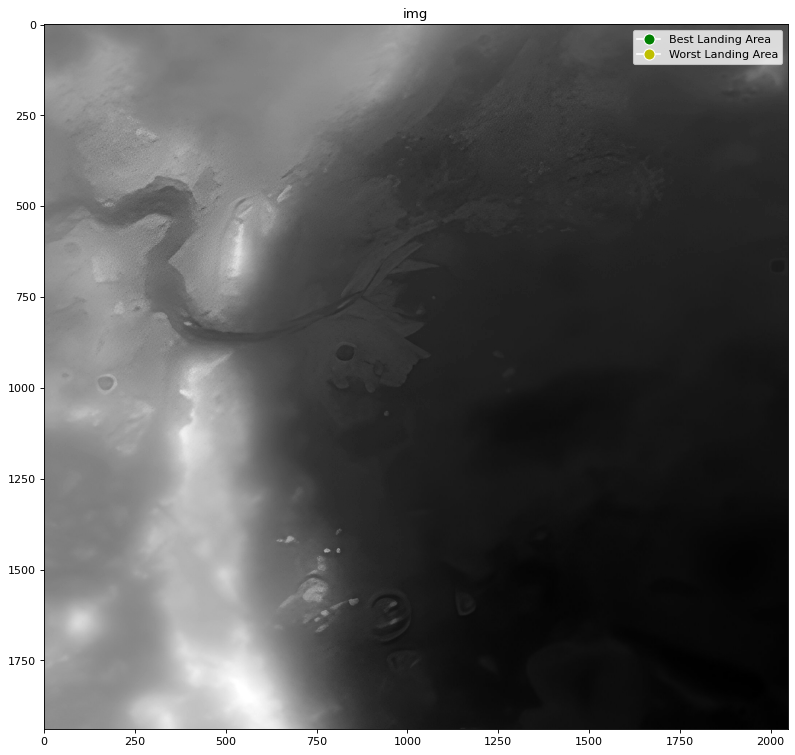

In [2]:
file_path = 'data\JEZ_ctx_B_soc_008_DTM_MOLAtopography_DeltaGeoid_20m_Eqc_latTs0_lon0_.jpg' 

showimg(load_image(file_path),'g',size=(12,12))

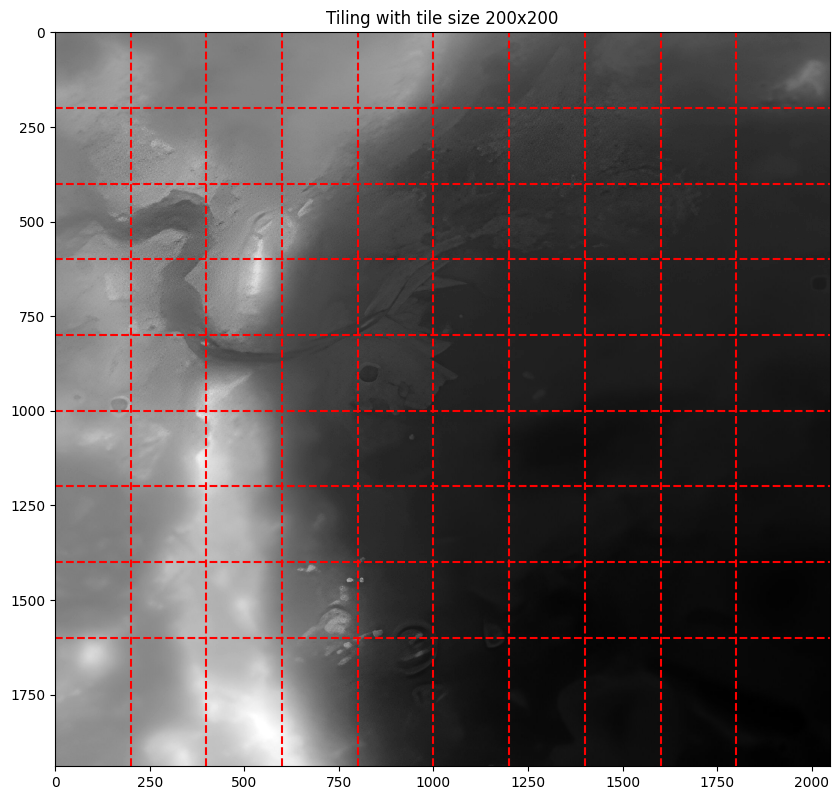

Tile 1: Avg Height = 142.040925, Max Height = 166, Min Height = 116, Std Dev = 14.26832681656735
Tile 2: Avg Height = 131.3493, Max Height = 162, Min Height = 118, Std Dev = 9.801315703006408
Tile 3: Avg Height = 127.70065, Max Height = 135, Min Height = 118, Std Dev = 2.9358371169906547
Tile 4: Avg Height = 138.599925, Max Height = 152, Min Height = 129, Std Dev = 4.557791679571918
Tile 5: Avg Height = 148.433225, Max Height = 169, Min Height = 100, Std Dev = 10.080463337534391
Tile 6: Avg Height = 100.085575, Max Height = 169, Min Height = 59, Std Dev = 21.941954149969757
Tile 7: Avg Height = 74.628025, Max Height = 103, Min Height = 49, Std Dev = 8.657257625794385
Tile 8: Avg Height = 71.525075, Max Height = 88, Min Height = 49, Std Dev = 7.078843213716136
Tile 9: Avg Height = 66.888325, Max Height = 85, Min Height = 52, Std Dev = 7.241201812846746
Tile 10: Avg Height = 75.3537, Max Height = 125, Min Height = 53, Std Dev = 10.95203845455265
Tile 11: Avg Height = 138.360225, Max Heig

In [3]:



tile_size = 200  
tile_statistics = main_calc(file_path, tile_size)


main_draw(file_path, tile_size)

# Print statistics for each tile
for idx, stats in enumerate(tile_statistics):
    print(f"Tile {idx+1}: Avg Height = {stats[0]}, Max Height = {stats[1]}, Min Height = {stats[2]}, Std Dev = {stats[3]}")




#### Tile size = 200 meaning that we have 200 pixel * 20 meter/pixel =  4km each tile
### The reasonable landing area for safe landing is **500m**, but the uncertainty of the landing spot will mean that we need more than one tile
this means that we need tile size of 500/20 = 25 pixels

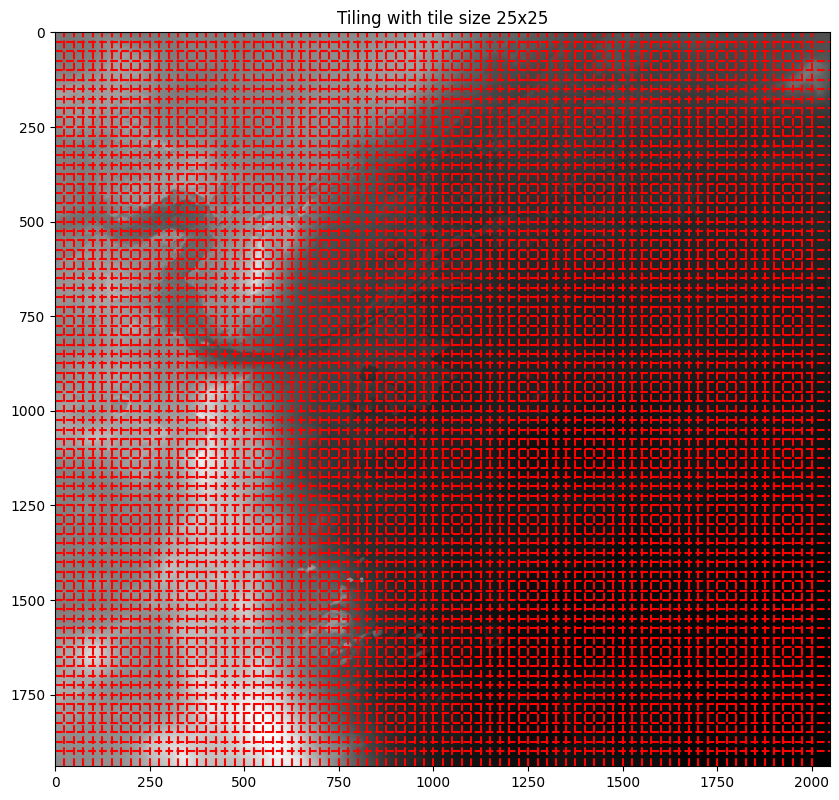

In [4]:
tile_size = 25  # Example tile size, this would mean each tile is 100x100 pixels
main_draw(file_path, tile_size)

_______

    3- Build a fromula to figure out if the tile is good place for landing

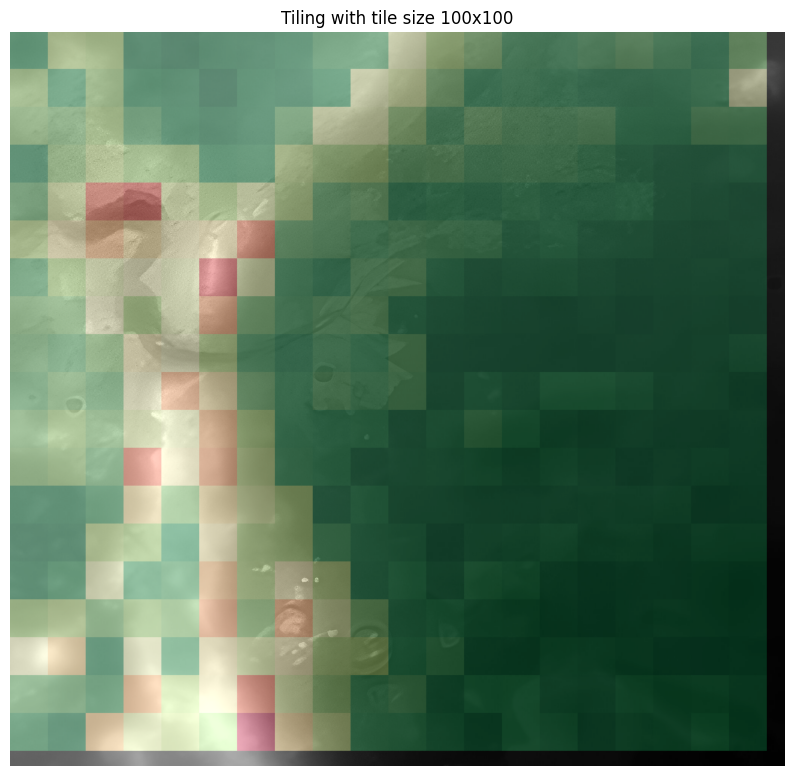

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def load_image(file_path):
    # Load the image in grayscale (heightmap)
    image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return image

def tile_image(image, tile_size):
    rows, cols = image.shape
    tile_rows = rows // tile_size
    tile_cols = cols // tile_size

    tiles = []
    for i in range(tile_rows):
        for j in range(tile_cols):
            tile = image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            tiles.append(tile)
    return tiles, tile_rows, tile_cols

def calculate_tile_statistics(tile):
    stddev_height = np.std(tile)
    return stddev_height

def create_colored_overlay(image, tile_size):
    tiles, tile_rows, tile_cols = tile_image(image, tile_size)
    stddevs = [calculate_tile_statistics(tile) for tile in tiles]
    
    # Normalize standard deviations to range [0, 1] for coloring
    norm = mcolors.Normalize(vmin=min(stddevs), vmax=max(stddevs))
    cmap = plt.get_cmap('RdYlGn_r')  # Red to green colormap

    # Create an overlay image
    overlay = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    
    index = 0
    for i in range(tile_rows):
        for j in range(tile_cols):
            tile_std = stddevs[index]
            color = cmap(norm(tile_std))[:3]  # Get RGB color
            color = [int(c * 255) for c in color]  # Convert to 0-255 range
            
            overlay[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size] = color
            index += 1
    
    return overlay

def main(file_path, tile_size,a1=0.7 ,a2= 0.4):
    image = load_image(file_path)
    overlay = create_colored_overlay(image, tile_size)
    
    # Blend the original image and the overlay
    blended = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR),a1 , overlay, a2, 0)
    
    # Display the result
    plt.figure(figsize=(10, 10))
    plt.imshow(blended)
    plt.title(f"Tiling with tile size {tile_size}x{tile_size}")
    plt.axis('off')
    plt.show()




tile_size = 100
main(file_path, tile_size)


Any yellowish or redish tiles means that this area is bad for landing

### With the right tile size

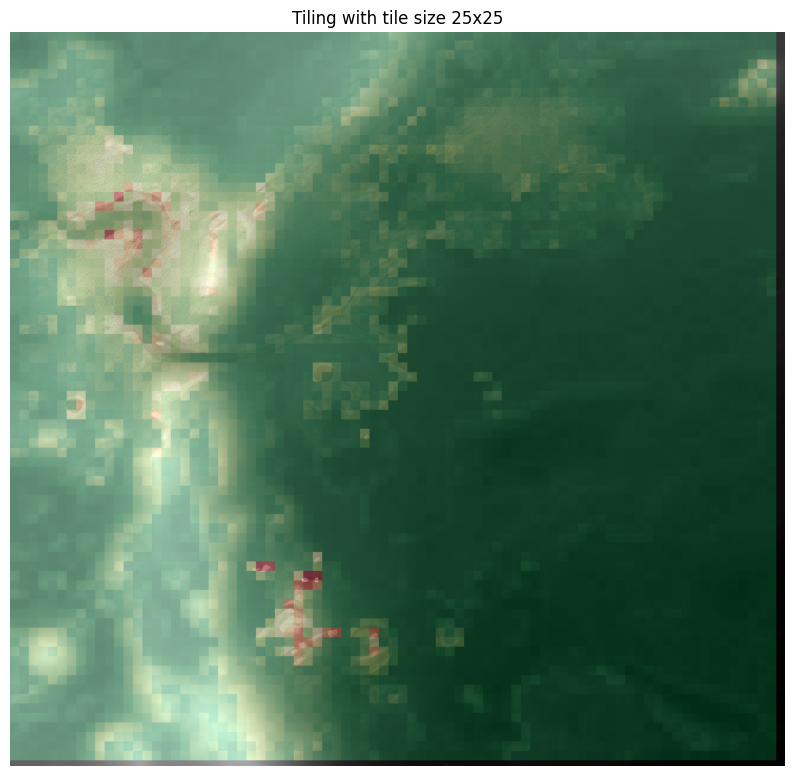

In [6]:
tile_size = 25
main(file_path,tile_size)

To show the effect more, increasing the alpha of the effect

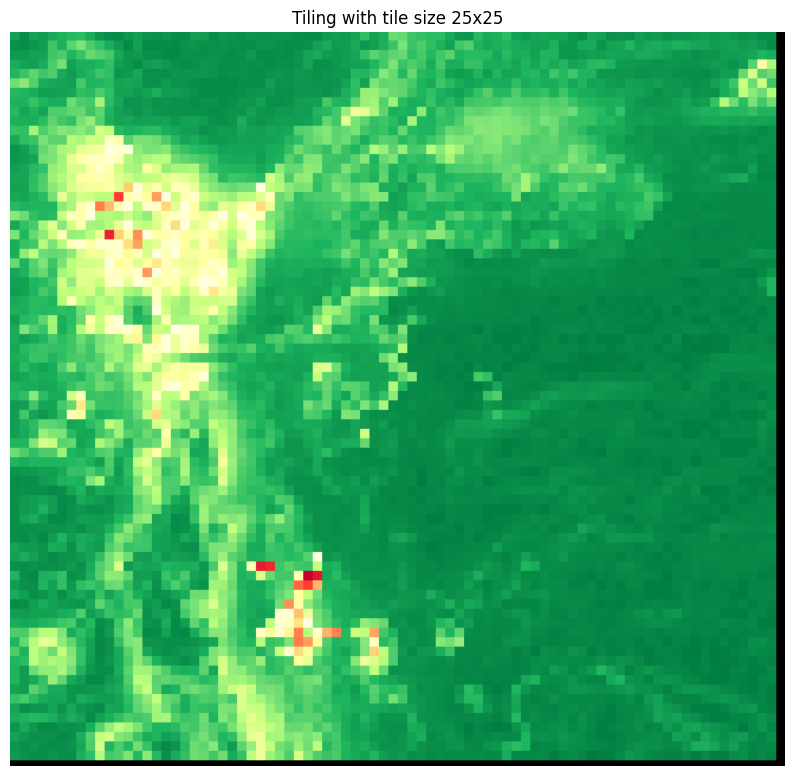

In [7]:
tile_size = 25
main(file_path,tile_size,a1= 0,a2= 1.2)

_______

In [8]:
from matplotlib import pyplot as plt

plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (12, 10)
plt.rcParams['axes.grid']=True
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']



In [9]:
image = cv2.imread("data\JEZ_ctx_B_soc_008_DTM_MOLAtopography_DeltaGeoid_20m_Eqc_latTs0_lon0_.jpg",cv2.IMREAD_GRAYSCALE)

tiles, tile_rows, tile_cols = tile_image(image, tile_size)
stddevs = [calculate_tile_statistics(tile) for tile in tiles]



In [10]:
len(stddevs)

6237

In [11]:
stddevs_n =np.array(stddevs)
np.mean(stddevs_n)

2.7588799518055347

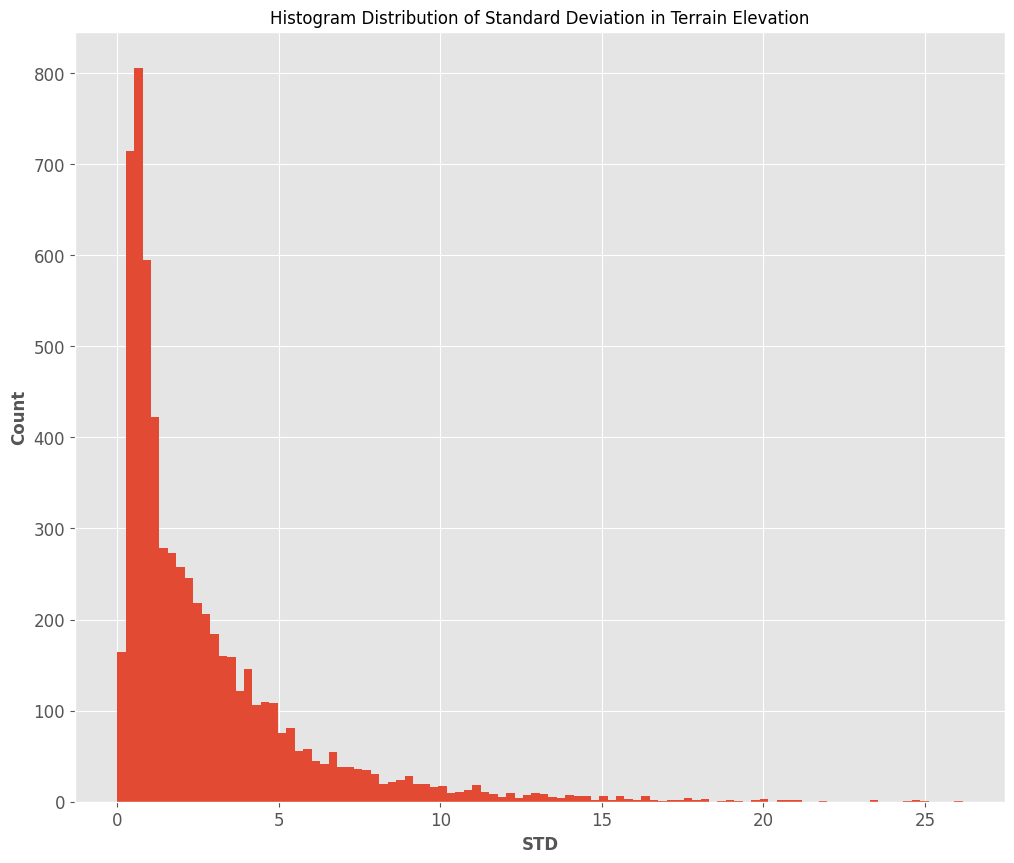

In [12]:
plt.hist(stddevs_n,bins=100);
plt.title(label= "Histogram Distribution of Standard Deviation in Terrain Elevation");
plt.ylabel( "Count");
plt.xlabel( "STD");

## Ignoring the outliers 

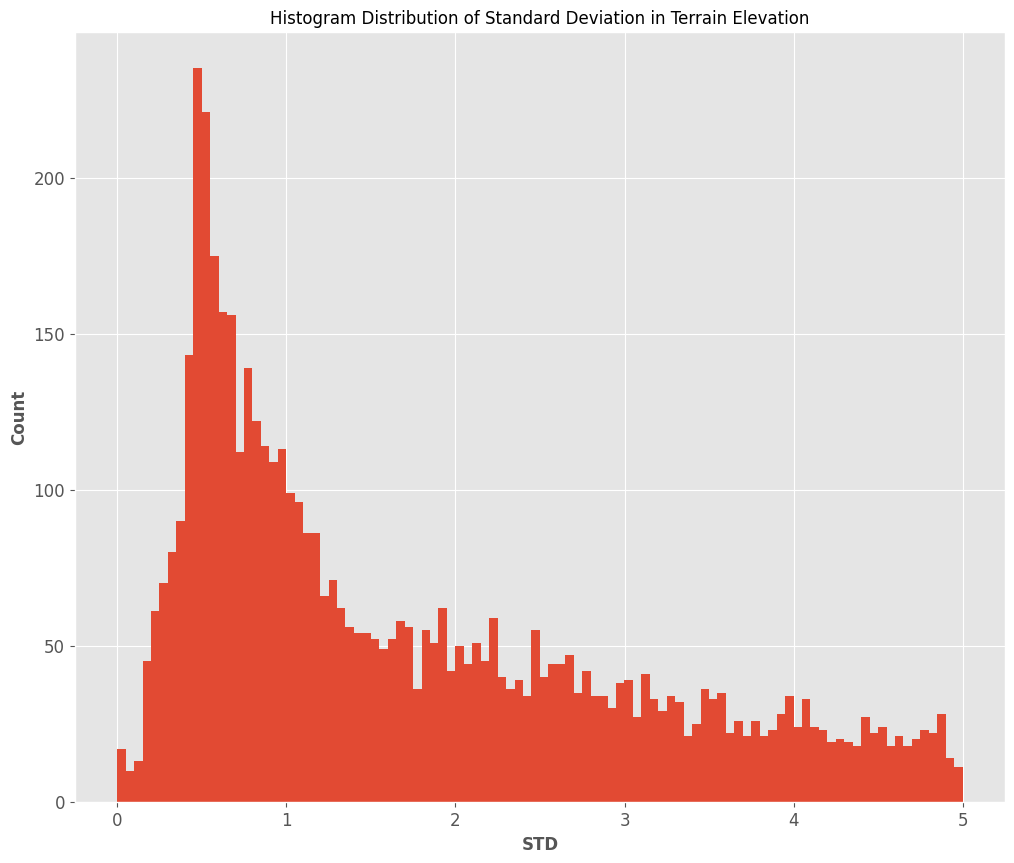

In [13]:
plt.hist(stddevs_n[stddevs_n<5],bins=100);
plt.title(label= "Histogram Distribution of Standard Deviation in Terrain Elevation");
plt.ylabel( "Count");
plt.xlabel( "STD");


#### filtering the tiles based on the STD

In [14]:
def find_suitable_tiles(image, max_allowed_std, tile_size):
    tiles, tile_rows, tile_cols = tile_image(image, tile_size)
    suitable_tiles = []

    for i in range(tile_rows):
        for j in range(tile_cols):
            tile = tiles[i * tile_cols + j]
            stddev = calculate_tile_statistics(tile)
            if stddev <= max_allowed_std:
                suitable_tiles.append((i, j))

    return suitable_tiles

def create_colored_overlay(image, tile_size, suitable_tiles):
    tiles, tile_rows, tile_cols = tile_image(image, tile_size)
    stddevs = [calculate_tile_statistics(tile) for tile in tiles]
    
    # Normalize standard deviations to range [0, 1] for coloring
    norm = mcolors.Normalize(vmin=min(stddevs), vmax=max(stddevs))
    cmap = plt.get_cmap('coolwarm')  # Red to white colormap

    # Create an overlay image
    overlay = np.zeros((image.shape[0], image.shape[1], 3), dtype=np.uint8)
    
    index = 0
    for i in range(tile_rows):
        for j in range(tile_cols):
            tile_std = stddevs[index]
            if (i, j) in suitable_tiles:
                color = [0, 255, 0]  # Green for suitable tiles
            else:
                color = cmap(norm(tile_std))[:3]  # Get RGB color
                color = [int(c * 255) for c in color]  # Convert to 0-255 range
                # pass
            
            overlay[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size] = color
            index += 1
    
    return overlay



def filter(image, tile_size, max_allowed_std, a1=0.5, a2=0.5,t=""):
    
    suitable_tiles = find_suitable_tiles(image, max_allowed_std, tile_size)
    overlay = create_colored_overlay(image, tile_size, suitable_tiles)
    
    # Blend the original image and the overlay
    blended = cv2.addWeighted(cv2.cvtColor(image, cv2.COLOR_GRAY2BGR), a1, overlay, a2, 0)
    
    return blended

In [15]:
tile_size = 100 
max_allowed_std = 10.0 

image = load_image(file_path)
suitable_tiles = find_suitable_tiles(image, max_allowed_std, tile_size)
print("Suitable tiles (row, col):", suitable_tiles)

Suitable tiles (row, col): [(0, 0), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (2, 16), (2, 17), (2, 18), (2, 19), (3, 0), (3, 1), (3, 3), (3, 4), (3, 5), (3, 6), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (4, 0), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (4, 16), (4, 17), (4, 18), (4, 19), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (5, 16), (5, 17), (5, 18), (5, 19), (6, 0), (6, 1), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (6, 16), (6, 17), (6, 18), (6, 19), (7, 0), (7, 1), (

In [16]:
from tqdm import tqdm_notebook

#### Visualize

In [17]:

def showframes_add(frames,ccmap= None,labels=[],label_font_size=8,nrows=0,ncols=0):
    """Sub function don't call it alone
    """

    plot_di = int(frames.shape[0]**0.5)

    if nrows ==0 or ncols ==0 :
        nrows, ncols = plot_di,plot_di 

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
    
    if len(labels)!=0:
        plt.subplots_adjust(left=0.1,bottom=0.02,right=0.9,top=0.99,wspace=0.3,hspace=0.4) ### Fixes the postions of the plots to show labels
        for ind ,ax in enumerate( axes.flat):
            
            im = ax.imshow(frames[int(ind)],cmap =ccmap) #### Plots the frame
            ax.set_title(f"lab: {labels[ind]}", fontstyle='italic',fontsize =label_font_size , pad=2) #### Writes the labels
            
            ax.set_xticks([])#### Turn of Ticks
            ax.set_yticks([])#### Turn of Ticks
        
            
            
                
    else:
        plt.subplots_adjust(left=0.1,bottom=0.02,right=0.9,top=0.9,wspace=0.3,hspace=0.4)  ### Fixes the postions of the plots
        for ind ,ax in enumerate( axes.flat):

            im = ax.imshow(frames[int(ind)],cmap =ccmap) #### Plots the frame
            ax.set_title(f"{ind}", fontstyle='italic',fontsize = label_font_size, pad=2)  #### Writes the frame number
            ax.set_xticks([])#### Turn of Ticks
            ax.set_yticks([])#### Turn of Ticks
        
        

    
    fig.subplots_adjust(right=0.85)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.02, 0.7])
    fig.colorbar(im, cax=cbar_ax)
    
    

    
#     fig.tight_layout(pad=3.0)
    
    
    
def showframes(frames,typee= None,fig_s = (10,10),labels: list =[],label_font_size: int =8,nrows=0,ncols=0):
     
    """good for dealing with many frames with different image types like RGB, BGR, GRAY... 
    with some types "cmaps":
    gist_gray = g
    jet = c
    tab20b = t
    viridis = v
    cividis = d
    BGR = bgr
    or leave it and will do defult

    labels are used to make titles for each image like the model prediction for this image takes a listlike 

    label_font_size takes int 

    """
    plt.rcParams['figure.figsize'] = fig_s
    figure(figsize=fig_s, dpi=100)
    
    
    if typee=="g":
        showframes_add(frames,ccmap ='gist_gray',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="c" :
        showframes_add(frames,ccmap ='jet',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="t" :
        showframes_add(frames,ccmap ='tab20b',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="v" :
        showframes_add(frames,ccmap ='viridis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    elif typee=="d" :
        showframes_add(frames,ccmap ='cividis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)

    elif typee=="RGB"or typee=='rgb':
        showframes_add(frames[:,:,:,[2,1,0]],ccmap ='cividis',labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
    else:
        showframes_add(frames,labels=labels,label_font_size= label_font_size,nrows=nrows,ncols=ncols)
        

    
    plt.show()
    


In [18]:

tile_size = 25 
max_allowed_std = 5.0 

tile_sizes = range(25,101,25)
max_allowed_stds = [0.5,.7,1,1.5,3,7,15]

image = load_image(file_path)

ims = []
labs = []
for tile_size in tqdm_notebook(tile_sizes):
    for max_allowed_std in max_allowed_stds:
        labs.append(f'Tile Size:{tile_size}   STD Lim:{max_allowed_std}')
        ims.append(filter(image, tile_size, max_allowed_std))



C:\Users\Mario\AppData\Local\Temp\ipykernel_7732\3884034434.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tile_size in tqdm_notebook(tile_sizes):


  0%|          | 0/4 [00:00<?, ?it/s]

<Figure size 2000x700 with 0 Axes>

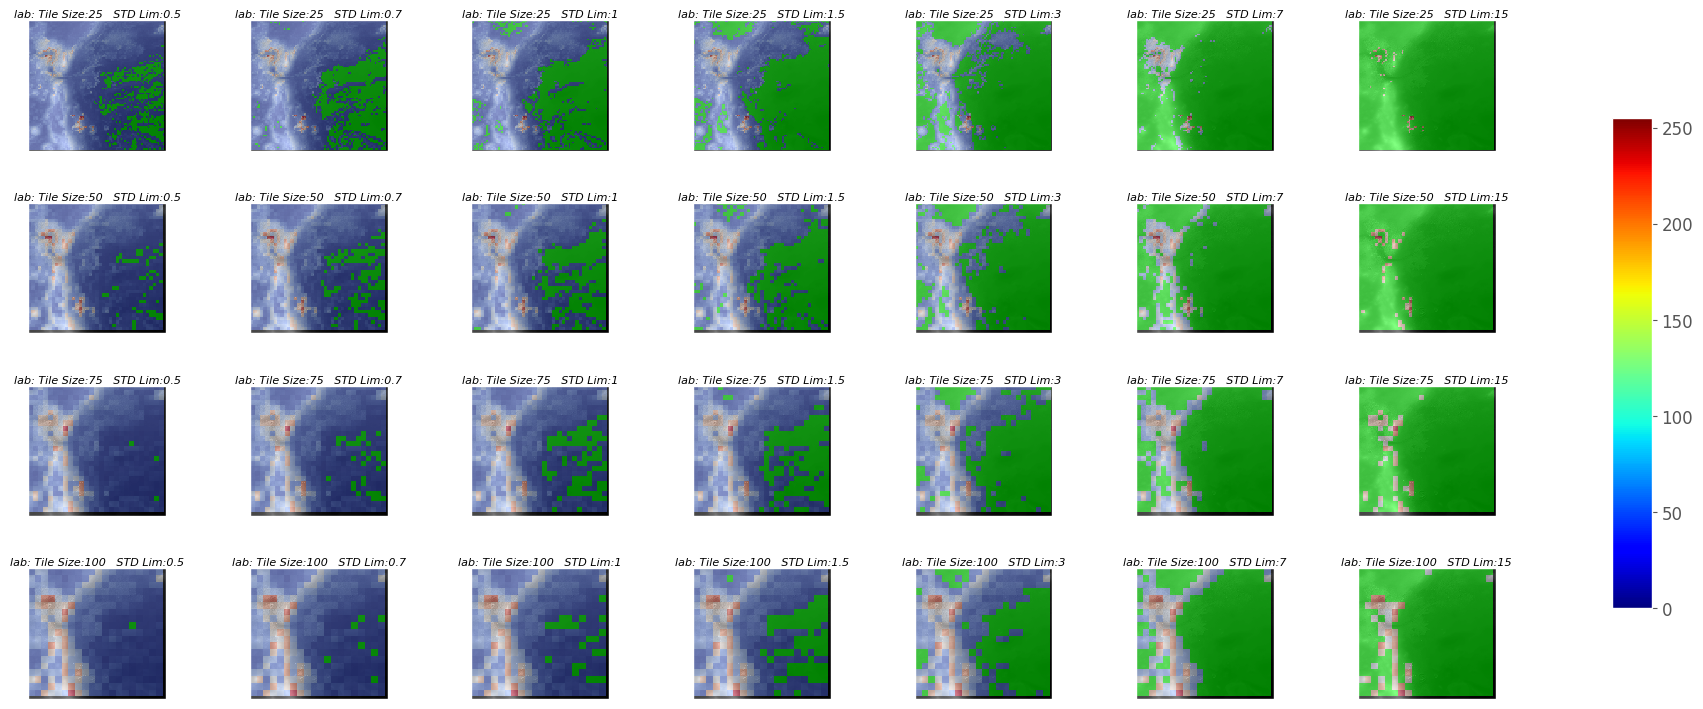

In [19]:
showframes(np.array(ims),fig_s=(20,7),labels=labs,ncols=len(max_allowed_stds),nrows=len(tile_sizes));

### stacking the good tiles

In [20]:
def tile_image(image, tile_size):
    rows, cols,_ = image.shape
    tile_rows = rows // tile_size
    tile_cols = cols // tile_size

    tiles = []
    for i in range(tile_rows):
        for j in range(tile_cols):
            tile = image[i*tile_size:(i+1)*tile_size, j*tile_size:(j+1)*tile_size]
            tiles.append(tile)
    return tiles, tile_rows, tile_cols




def filter(image, tile_size, max_allowed_std, a1=0.5, a2=0.5,t=""):
    
    suitable_tiles = find_suitable_tiles(image, max_allowed_std, tile_size)
    overlay = create_colored_overlay(image, tile_size, suitable_tiles)
    
    # Blend the original image and the overlay
    blended = cv2.addWeighted(image, a1, overlay, a2, 0)
    
    return blended

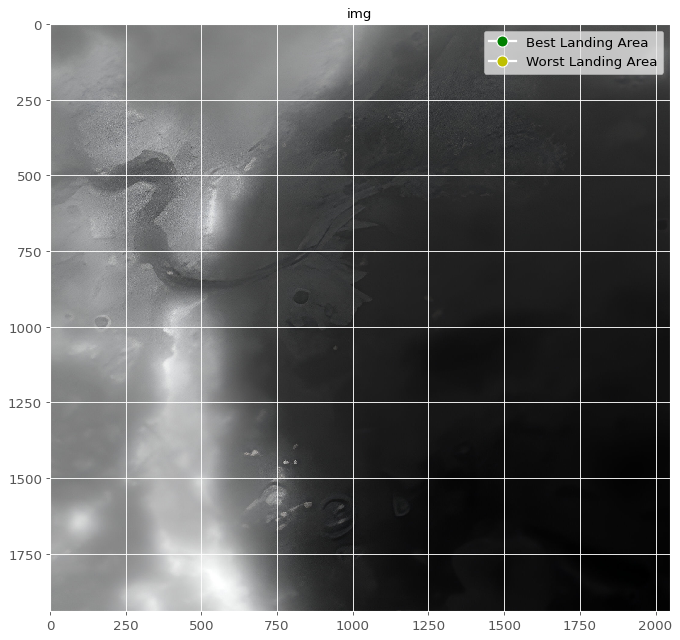

C:\Users\Mario\AppData\Local\Temp\ipykernel_7732\1444362737.py:15: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for tile_size in tqdm_notebook(tile_sizes):


  0%|          | 0/4 [00:00<?, ?it/s]

In [21]:

tile_size = 25 
max_allowed_std = 1

tile_sizes = range(25,101,25)


image = cv2.imread(file_path)

img_f = image.copy()

showimg(img_f)

ims = []
labs = []
for tile_size in tqdm_notebook(tile_sizes):
    img_f = filter(img_f, tile_size, max_allowed_std,a1=0.5,a2=0.5)




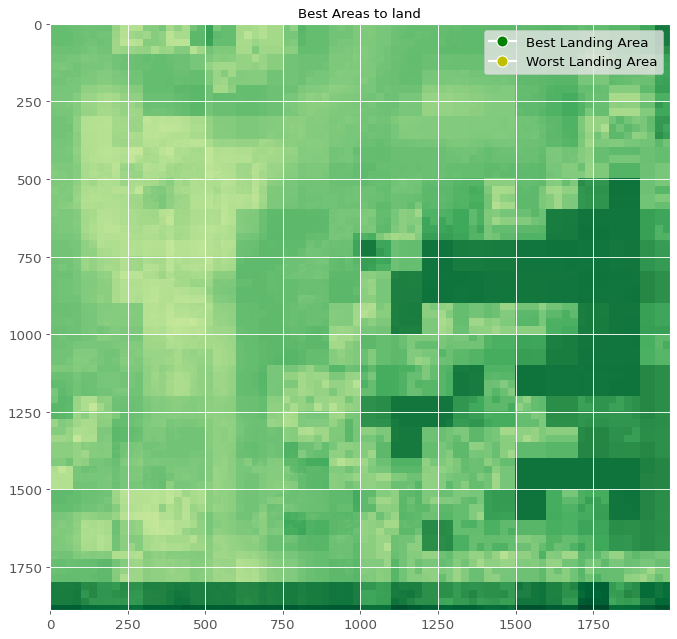

In [22]:
img_f[0,0]=[0,0,0]
img_f[0,0]=[255,255,255]
showimg(255-(img_f[:-50,:-50,1]**1.9)-30,'dd',title="Best Areas to land",dd="YlGn")